In [ ]:
import os
HOME = os.getcwd()

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q roboflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.3 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 64M
-rw-r--r-- 1 root root 64M May 23 09:38 yolov10m.pt


In [ ]:
from ultralytics import YOLOv10
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="QG8ALTQot433MNr2TbHJ")
project = rf.workspace("rocket-9hzvp").project("detect-ads-objects")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Detect-ads-objects-4 in yolov8:: 100%|██████████| 1178/1178 [00:00<00:00, 4795.54it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
!mkdir Detect-ads-objects-4/Detect-ads-objects-4
!mv Detect-ads-objects-4/test Detect-ads-objects-4/Detect-ads-objects-4/test
!mv Detect-ads-objects-4/train Detect-ads-objects-4/Detect-ads-objects-4/train
!mv Detect-ads-objects-4/valid Detect-ads-objects-4/Detect-ads-objects-4/valid

In [ ]:
!yolo task=detect mode=train epochs=50 batch=26 plots=True model=./weights/yolov10m.pt data={dataset.location}/data.yaml

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=./weights/yolov10m.pt, data=/content/Detect-ads-objects-4/data.yaml, epochs=50, time=None, patience=100, batch=26, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

In [ ]:
!yolo resume model=./runs/detect/train5/weights/last.pt batch=24

WARNING ⚠️ 'mode' argument is missing. Valid modes are {'predict', 'benchmark', 'track', 'train', 'export', 'val'}. Using default 'mode=train'.
New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train5/weights/last.pt, data=/content/Detect-ads-objects-4/data.yaml, epochs=50, time=None, patience=100, batch=24, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/train5/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=Non

In [ ]:
!yolo task=detect mode=val model=./runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16456174 parameters, 0 gradients, 63.4 GFLOPs
val: Scanning /content/Detect-ads-objects-4/Detect-ads-objects-4/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:06<00:00,  2.01s/it]
                   all         48        588      0.727      0.596      0.619      0.409
                banner         48         31       0.56      0.742      0.637      0.475
                bottle         48         54      0.781      0.537      0.557      0.353
                   can         48         95       0.63      0.484      0.507       0.29
                carton         48        376      0.859      0.699      0.785      0.495
             icebucket         48         32      0.805      0.516      0.608      0.431
Speed: 2.3ms prepro

In [ ]:
from IPython.display import Image


/content


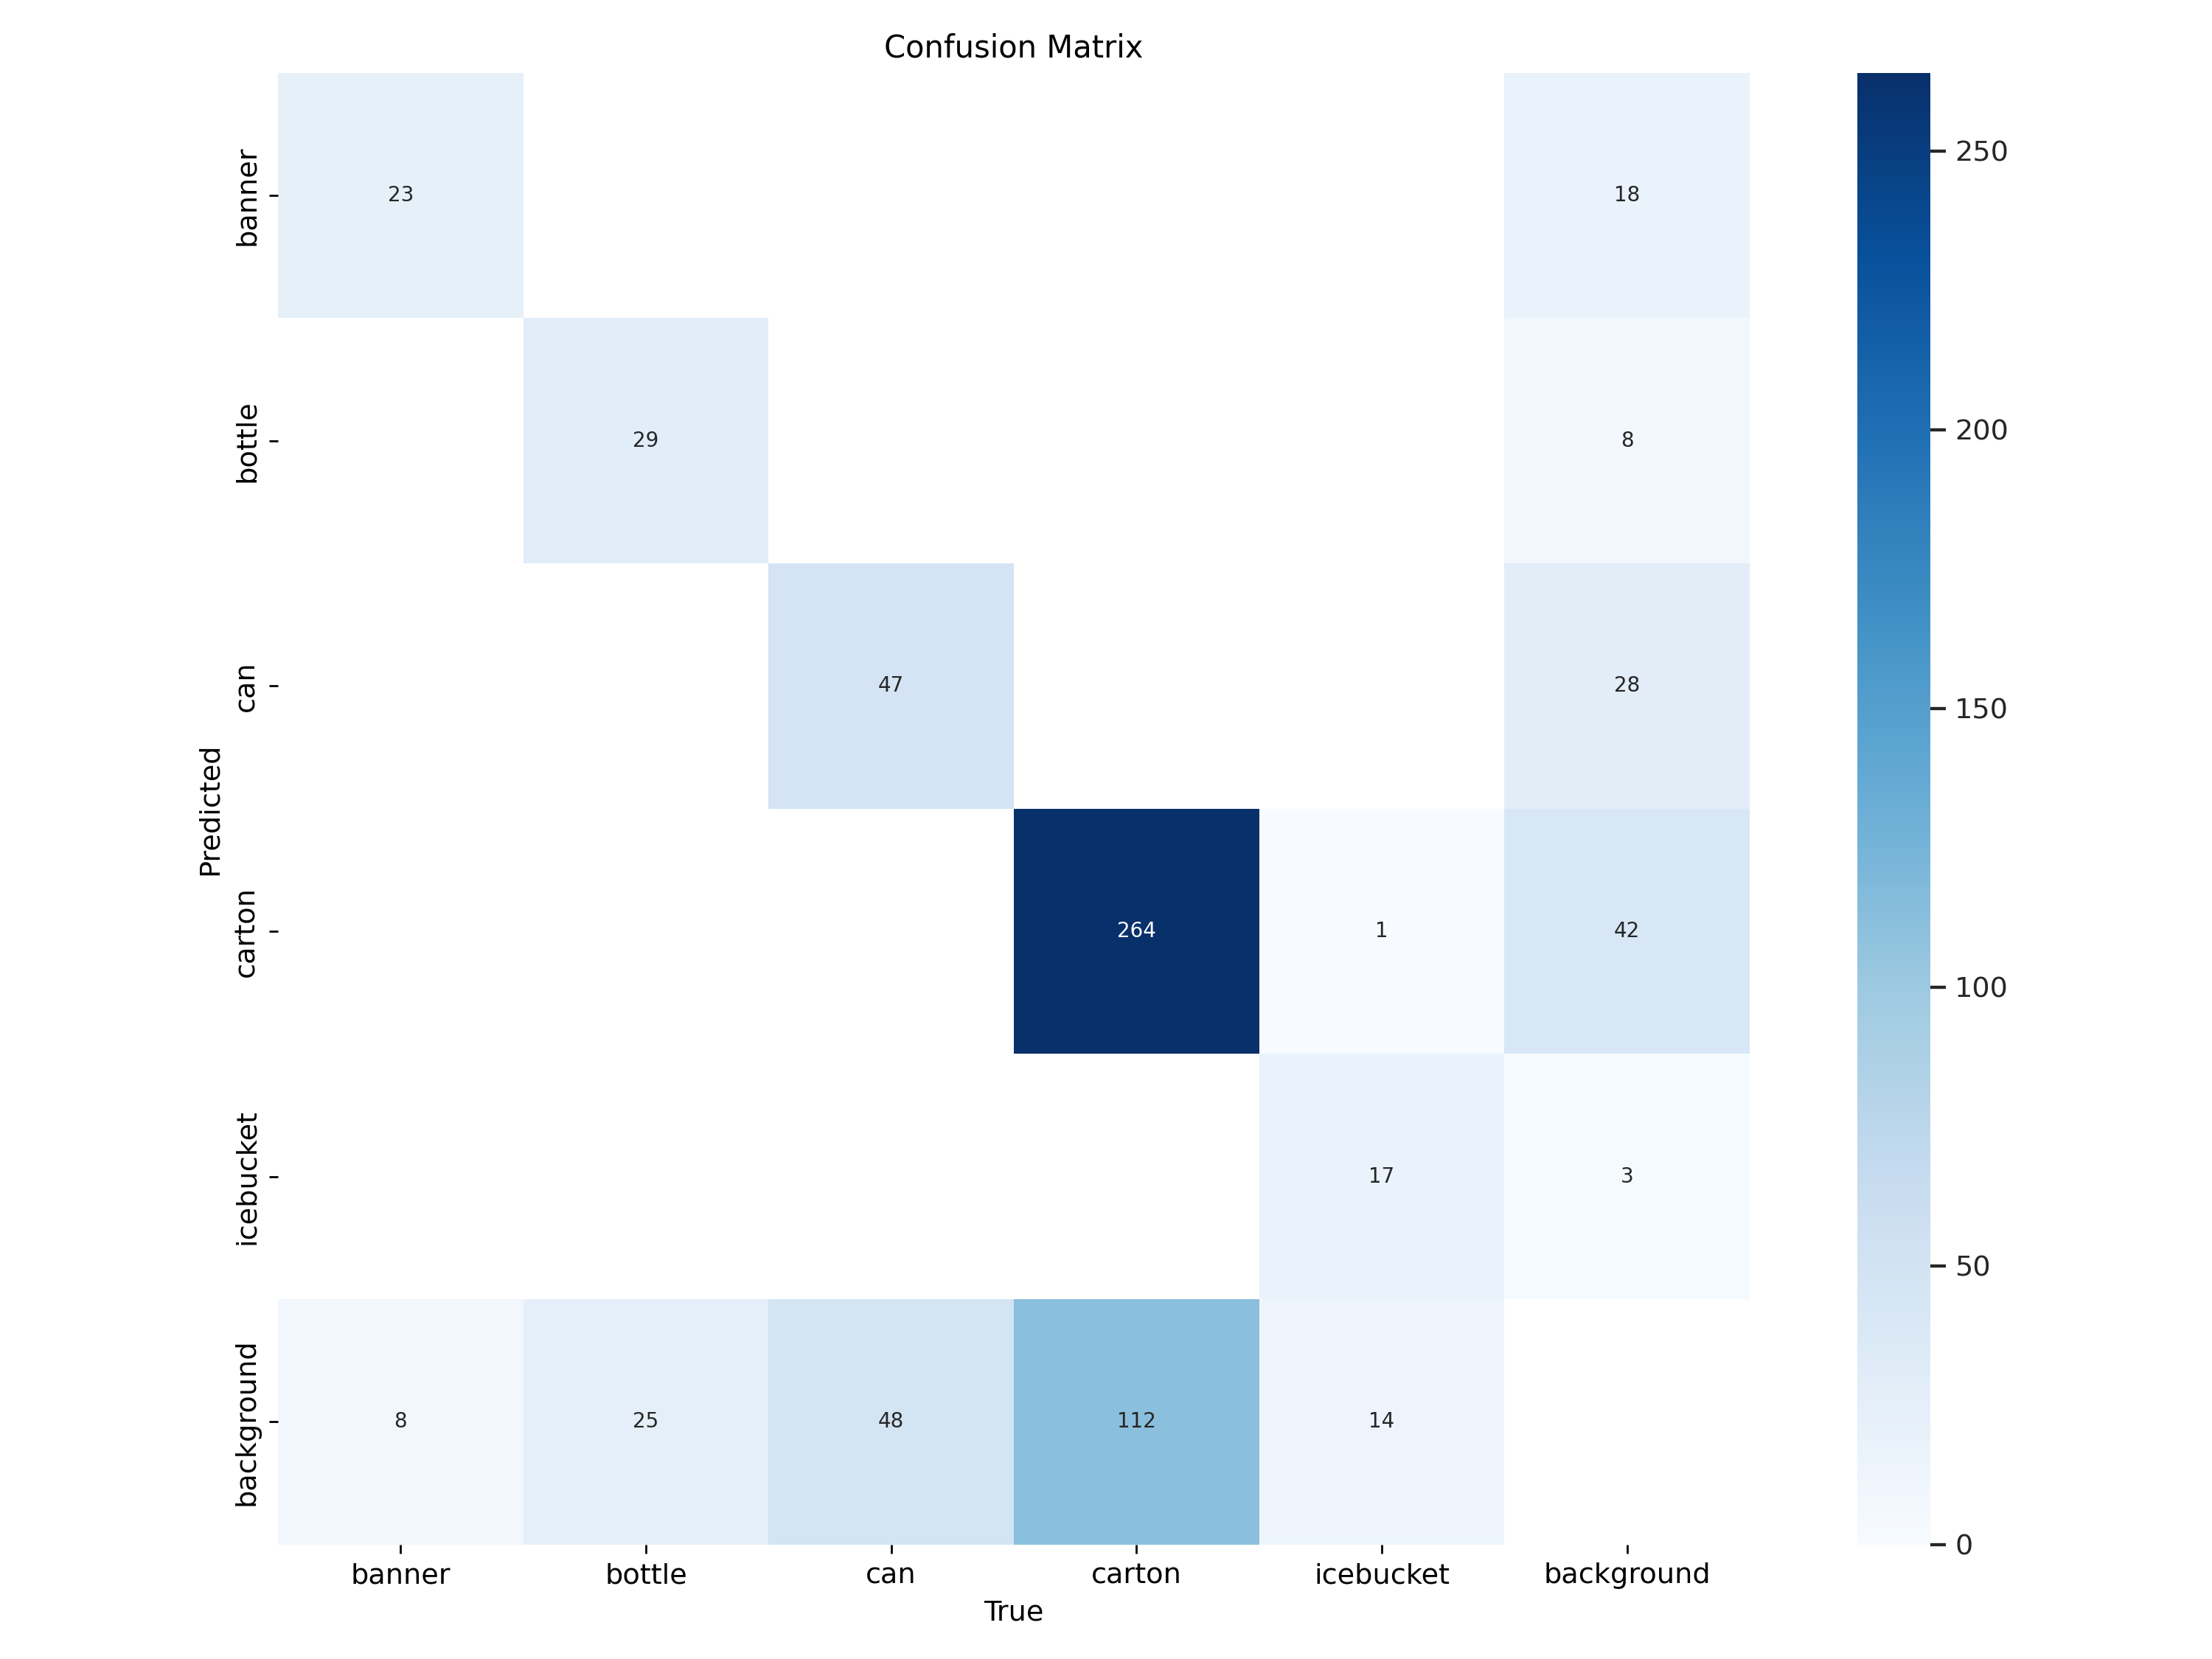

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/content


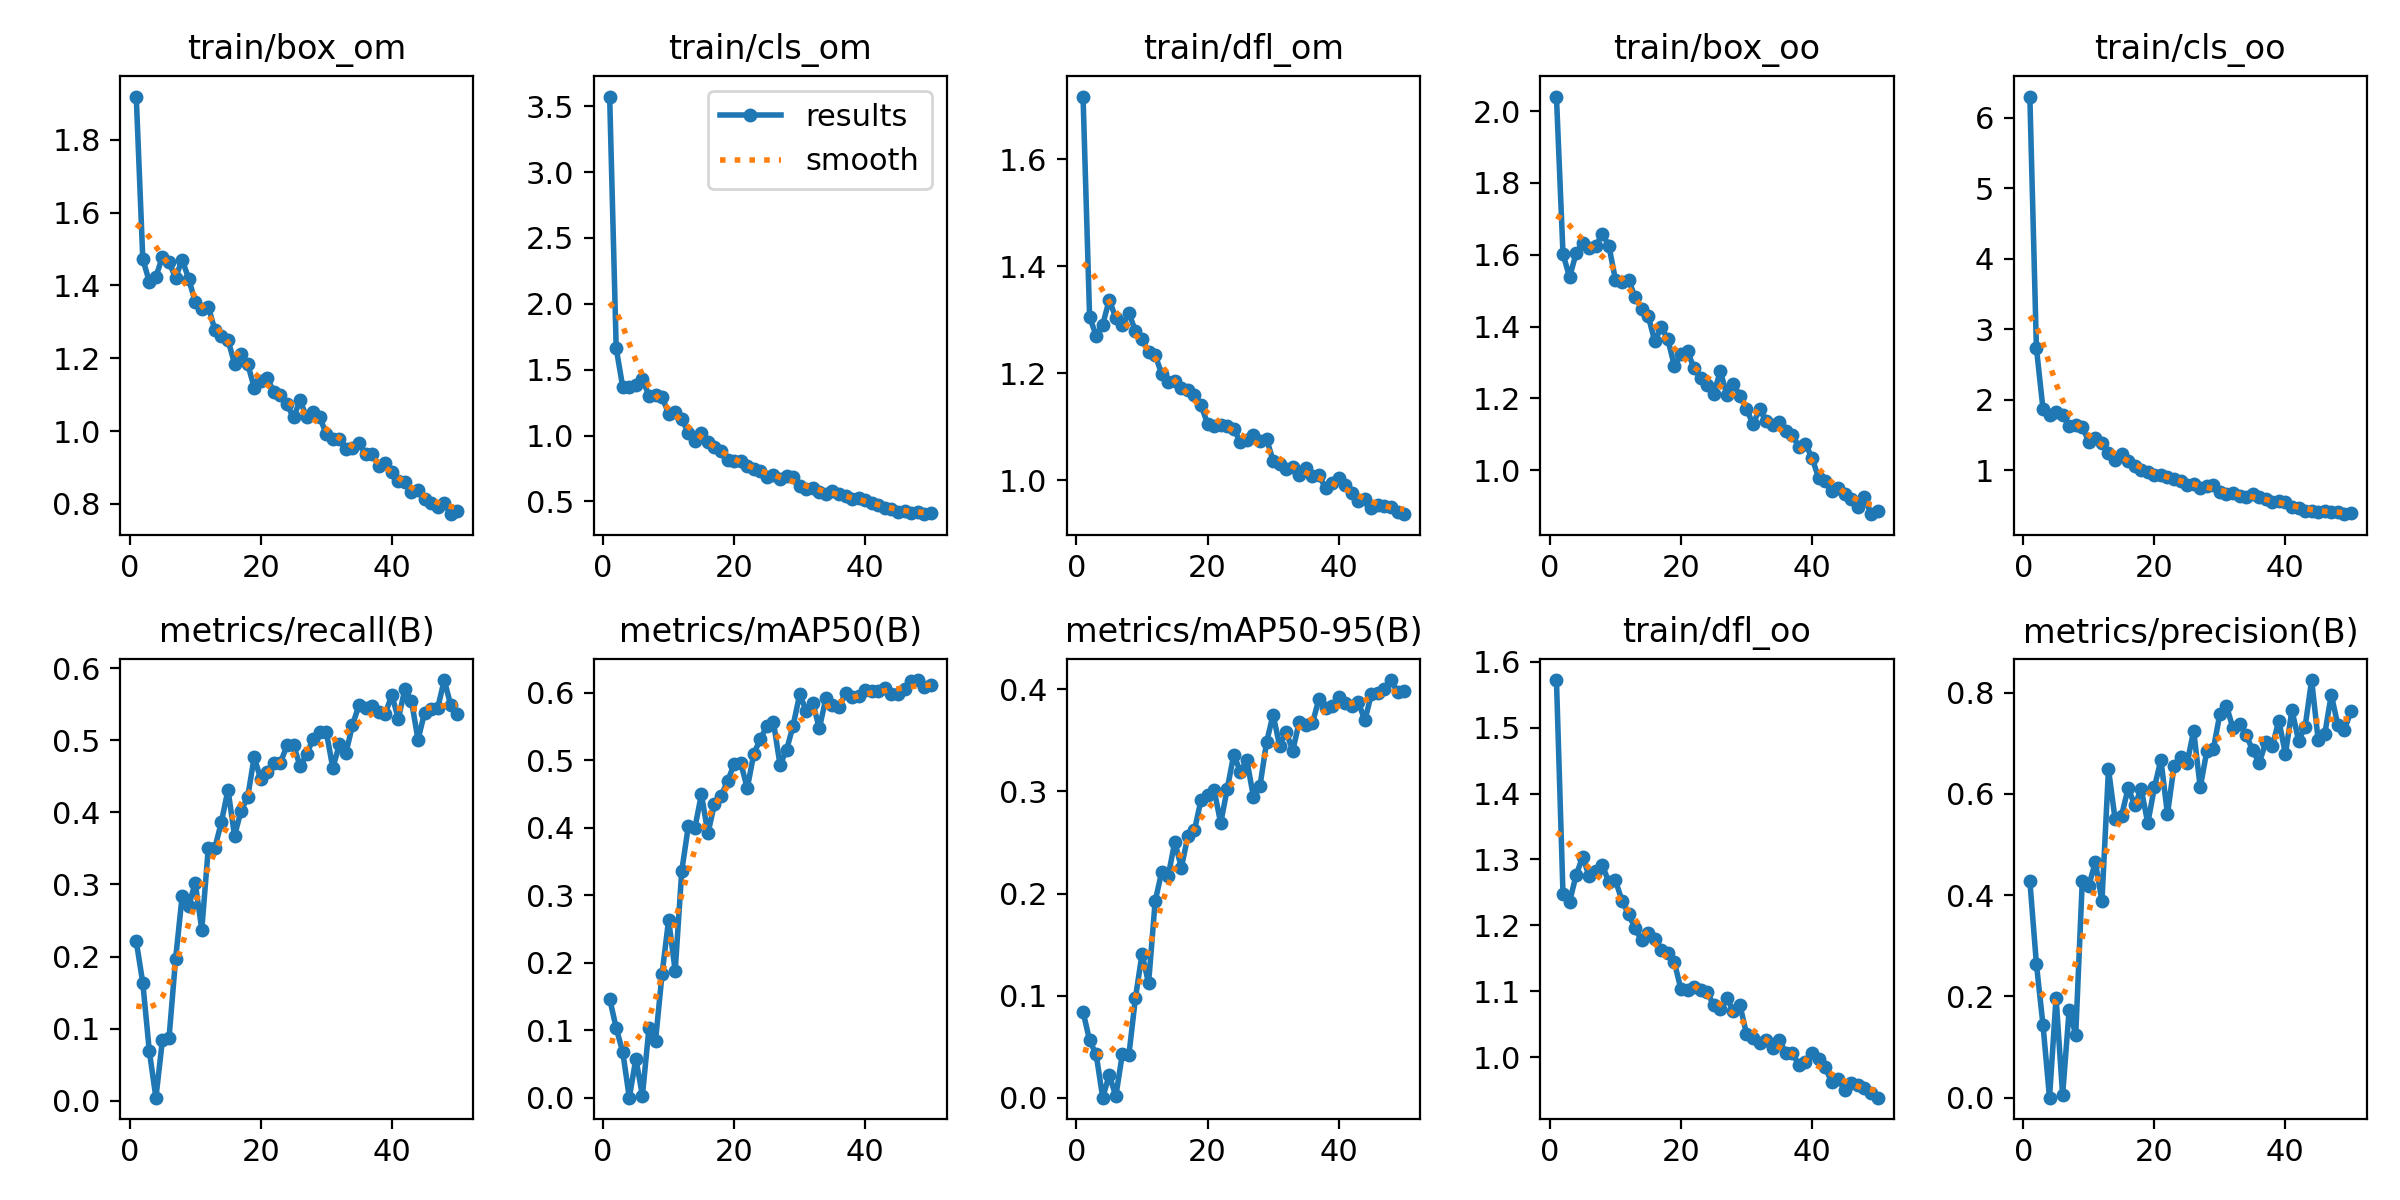

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# change "/content/gdrive/MyDrive/"  to "/mydrive so you can use directly /mydrive"
!ln -s /content/gdrive/MyDrive/ /mydrive

Mounted at /content/gdrive


In [ ]:
!cp ./runs/detect/train5/weights/best.pt /mydrive/detector.pt